# Task-2

# Perform data cleaning and exploratory data analysis (EDA)

The Titanic dataset, a classic dataset for data science and machine learning. This dataset provides information on the passengers aboard the Titanic, including whether they survived or not.

First, we'll go through the steps of data cleaning, and then we'll perform exploratory data analysis (EDA) to uncover patterns and relationships in the data.

Step 1: Data Cleaning

Load the Data: Load the dataset and check its structure.

Missing Values: Identify and handle missing values.

Data Types: Ensure all data types are appropriate for analysis.

Duplicates: Check and remove any duplicate records.

Outliers: Identify and handle any outliers if necessary.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rich.console import Console
console=Console()

In [2]:
df_train=pd.read_csv('C:\\Users\\NIHARIKA\\Documents\\intern\\taskTwo\\train.csv')
df_train  # loading the data set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Types

verify that the data types of each column are appropriate for analysis.

In [3]:
datadict = pd.DataFrame(df_train.dtypes)
console.print(datadict)

0
PassengerId    int64
Survived       int64
Pclass         int64
Name          object
Sex           object
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Cabin         object
Embarked      object

In [5]:
datadict['MissingVal'] = df_train.isnull().sum()# MISSING VALUES
datadict['NUnique']=df_train.nunique()# UNIQUE VALUES
datadict

,0,MissingVal,NUnique
PassengerId,int64,0,891
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248


# Missing Values

check for missing values in the dataset and decide on appropriate strategies to handle them.

In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Interpolation

Alternatively, you can also choose to interpolate missing values: the interpolate() function will perform a linear interpolation at the missing data points to “guess” the value that is most likely to be filled in.

In [7]:
df_train.interpolate()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.5,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Duplicates

check for duplicate records and remove them if any are found.

In [8]:
df = pd.DataFrame(df_train)
duplicates = df.duplicated()
console.print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [9]:
# Check for duplicates
print(df_train.duplicated().sum())

# Remove duplicates if any
print(df_train.drop_duplicates(inplace=True))

0
None


# Outliers

Outliers can be identified using statistical methods or visualizations. We'll inspect the numerical columns for potential outliers.

In [10]:
# Describe the numerical columns
describe=df_train.describe()
describe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Step 2: Exploratory Data Analysis (EDA)

Univariate Analysis: Analyze individual variables to understand their distributions.

Bivariate Analysis: Explore relationships between pairs of variables.

Multivariate Analysis: Examine relationships involving more than two variables.

Visualization: Use visualizations to uncover patterns and trends.

# Univariate Analysis

Analyze the distribution of individual variables, such as Survived, Pclass, Age, Fare, etc.

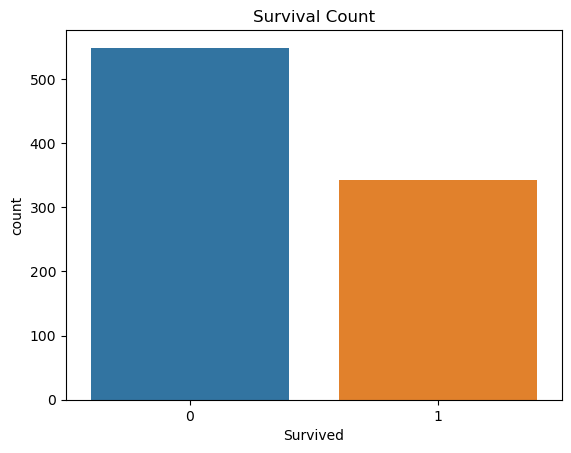

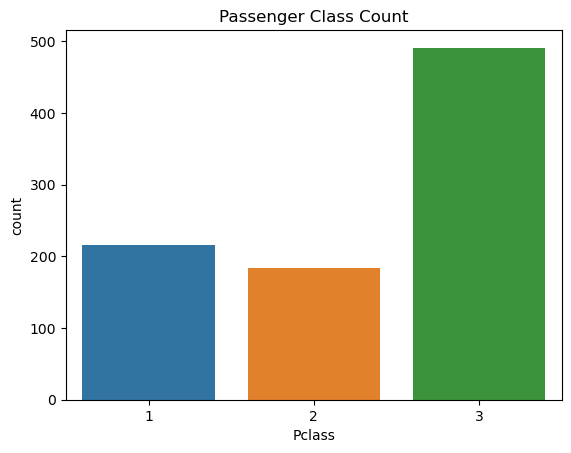

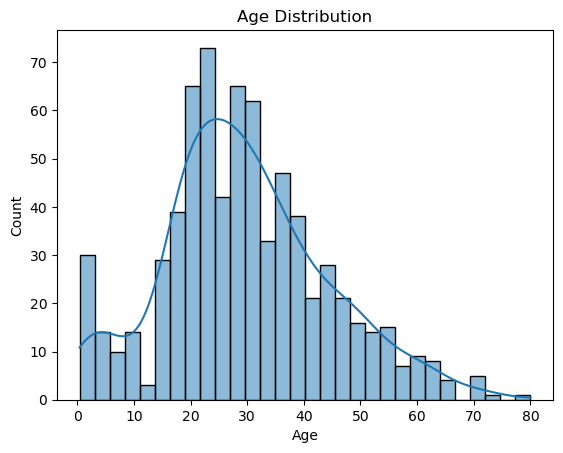

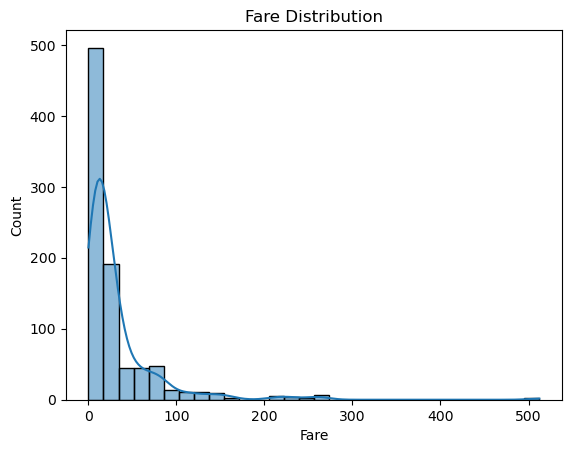

In [11]:
# Plot distribution of Survived
sns.countplot(data=df_train, x='Survived')
plt.title('Survival Count')
plt.show()

# Plot distribution of Pclass
sns.countplot(data=df_train, x='Pclass')
plt.title('Passenger Class Count')
plt.show()

# Plot distribution of Age
sns.histplot(data=df_train, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Plot distribution of Fare
sns.histplot(data=df_train, x='Fare', bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()


# Bivariate Analysis

We'll explore the relationships between pairs of variables, such as Survived and Pclass, Survived and Sex, etc.

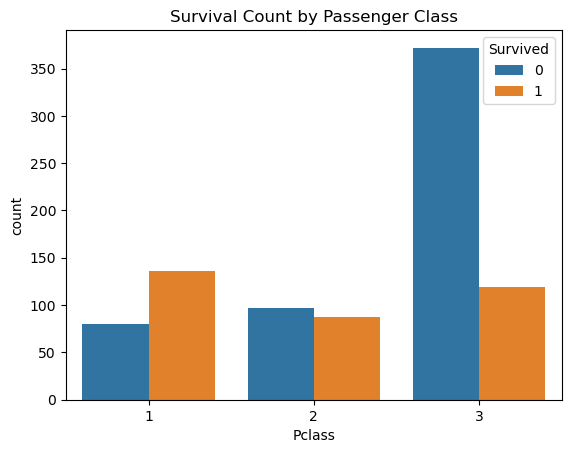

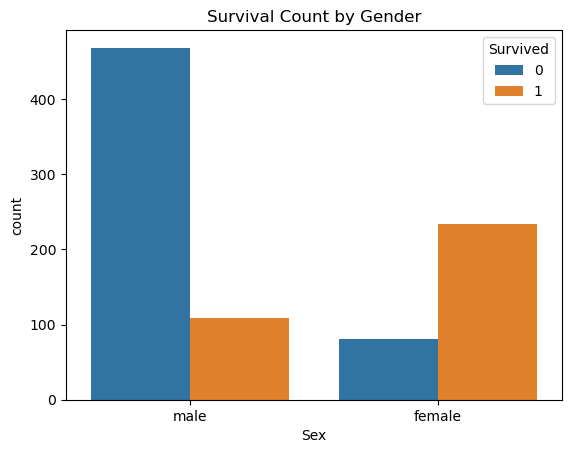

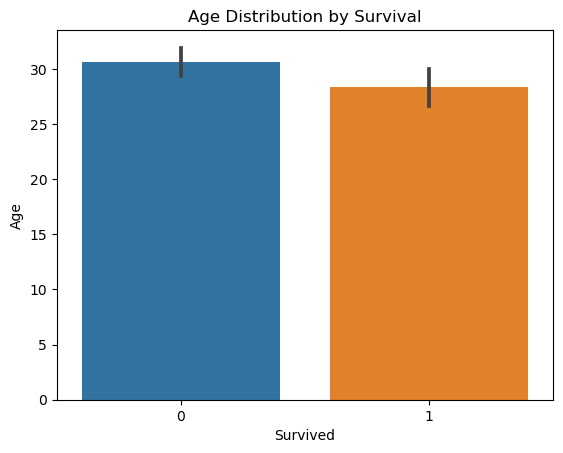

In [12]:
# Survived vs Pclass
sns.countplot(data=df_train, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.show()

# Survived vs Sex
sns.countplot(data=df_train, x='Sex', hue='Survived')
plt.title('Survival Count by Gender')
plt.show()

# Survived vs Age
sns.barplot(data=df_train, x='Survived', y='Age')
plt.title('Age Distribution by Survival')
plt.show()


# Multivariate Analysis

We'll examine the relationships involving more than two variables, such as Survived by Pclass and Sex.

C:\Users\NIHARIKA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


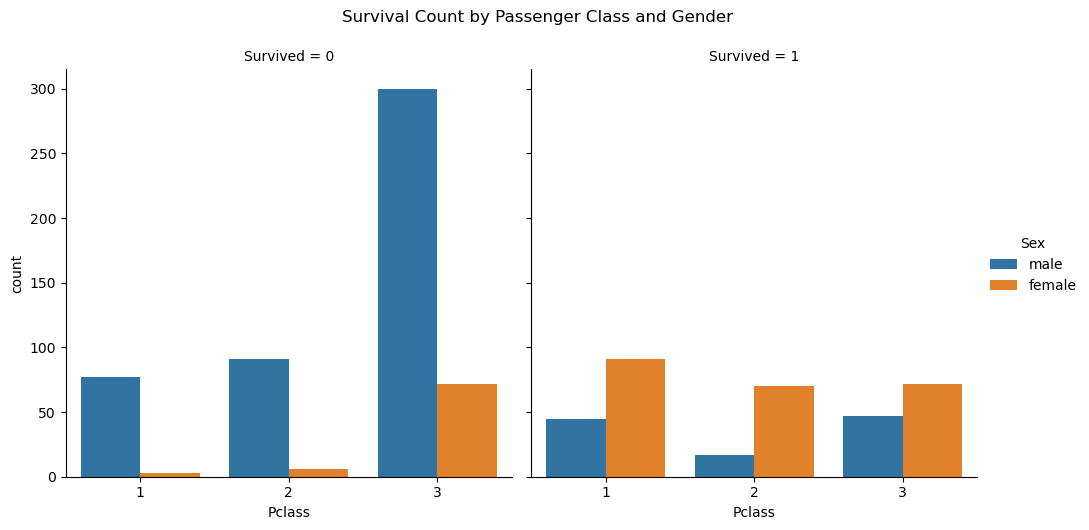

In [13]:
# Survived vs Pclass and Sex
sns.catplot(data=df_train, x='Pclass', hue='Sex', col='Survived', kind='count')
plt.suptitle('Survival Count by Passenger Class and Gender', y=1.05)
plt.show()


For the Titanic dataset:

Survived vs Age: The scatter plot might show how survival rates vary with age.
    
Pclass vs Fare: The scatter plot might show how fare varies across different passenger classes.
    
Age Distribution: The diagonal plot for 'Age' might show the age distribution of passengers.
    
By generating a pair plot, we get a comprehensive visual summary of how each feature interacts with every other feature in the dataset, which is valuable for exploratory data analysis (EDA).








C:\Users\NIHARIKA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


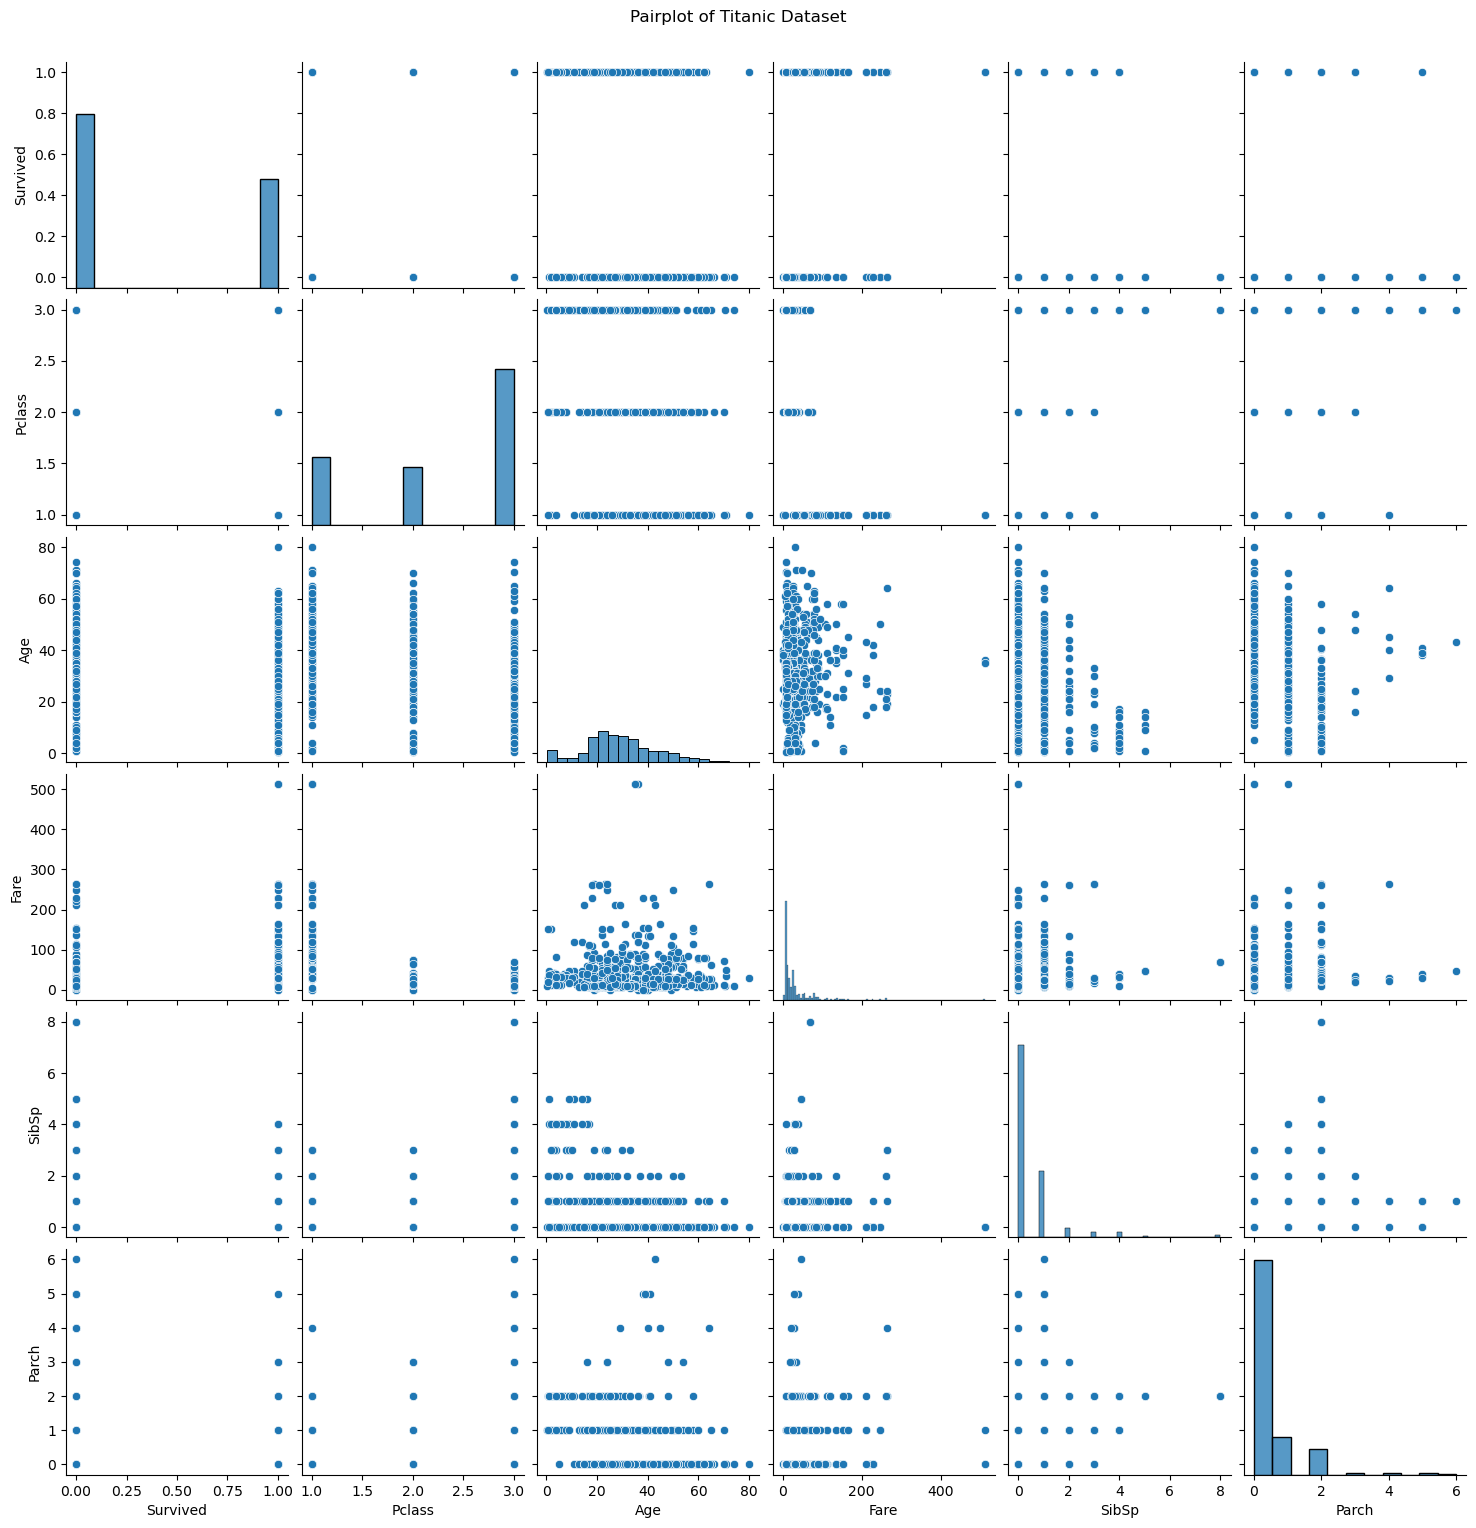

In [14]:
# Pairplot to see the interaction between different features
sns.pairplot(df_train[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']])
plt.suptitle('Pairplot of Titanic Dataset', y=1.02)
plt.show()


# ML- model Random Forest Classifier

 Strong baseline model for predicting survival on the Titanic dataset

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
# Handle missing values
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
df_train['Cabin_known'] = df_train['Cabin'].notna().astype(int)

In [17]:
# Drop unnecessary columns
df_train.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

In [18]:
# Encode categorical variables
le = LabelEncoder()
df_train['Sex'] = le.fit_transform(df_train['Sex'])
df_train['Embarked'] = le.fit_transform(df_train['Embarked'])

In [19]:
# Define features and target variable
X = df_train.drop(columns=['Survived'])
y = df_train['Survived']

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:


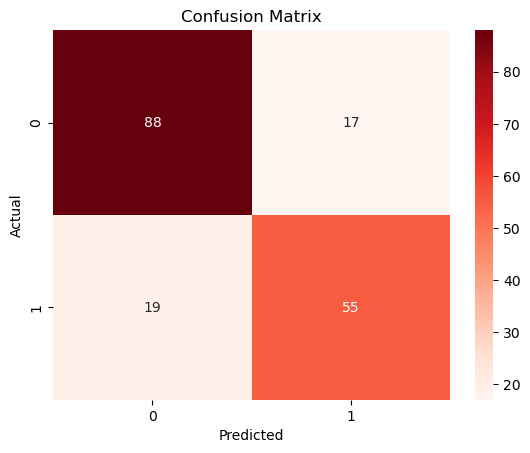

In [22]:
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# This bar chart will help you identify which features are most important in predicting survival on the Titanic, according to the Random Forest model.

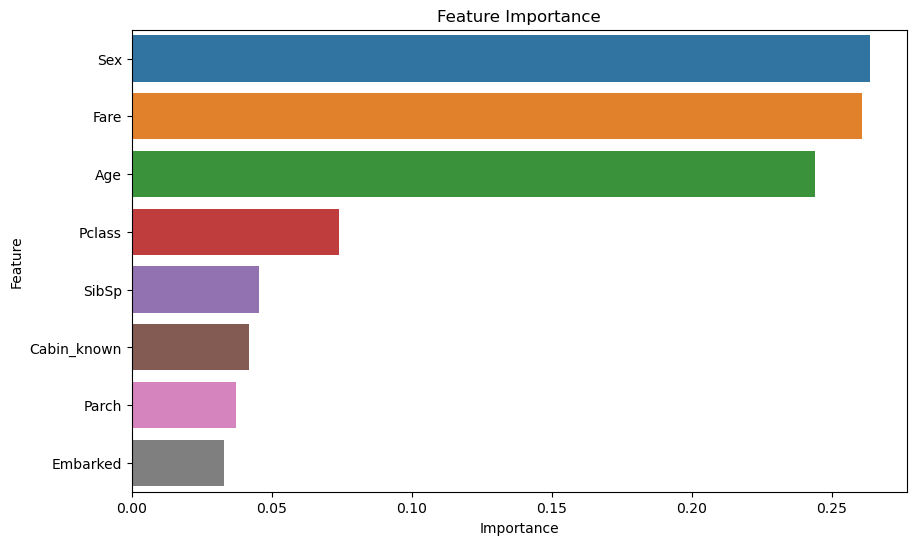

In [23]:
# Feature Importance
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


Survival Rate: 0.40
Death Rate: 0.60


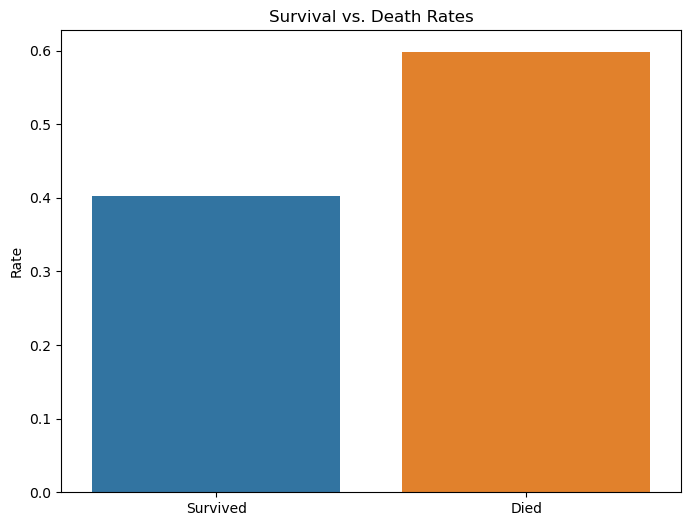

In [24]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of survival

# Calculate survival rates
survived = sum(y_pred)
died = len(y_pred) - survived
survival_rate = survived / len(y_pred)
death_rate = died / len(y_pred)

print(f'Survival Rate: {survival_rate:.2f}')
print(f'Death Rate: {death_rate:.2f}')

# Plot survival vs. death rates
labels = ['Survived', 'Died']
rates = [survival_rate, death_rate]

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=rates)
plt.title('Survival vs. Death Rates')
plt.ylabel('Rate')
plt.show()